In [ ]:
# Install the necessary dependencies

import os
import sys
import numpy as np
import pandas as pd
!{sys.executable} -m pip install --quiet jupyterlab_myst ipython

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---


# Introduction and Data Structures
 
Pandas is a fast, powerful, flexible and easy-to-use open-source data analysis and manipulation tool, built on top of the Python programming language.

## Introducing Pandas objects

In 3 sections, we’ll start with a quick, non-comprehensive overview of the fundamental data structures in Pandas to get you started. The fundamental behavior about data types, indexing, axis labeling, and alignment apply across all of the objects. 

## Overview

In this section, we'll introduce two data structure of pandas and the basic concept of data indexing and selection.

### Series

`Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a `Series` is to call:

`s = pd.Series(data, index=index)`

Here, `data` can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)


The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what the **data is**:

#### Create a Series

##### From ndarray

If `data` is an ndarray, **index** must be the same length as the **data**. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [4]:
s

a   -1.093235
b   -0.875870
c    0.548668
d   -0.396314
e   -0.462231
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
pd.Series(np.random.randn(5))

0    0.820731
1   -1.040583
2   -1.494295
3    0.214854
4    0.969364
dtype: float64

:::{note}
Pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.
:::

##### From dict
`Series` can be instantiated from dicts:

In [7]:
d = {"b": 1, "a": 0, "c": 2}

In [8]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [9]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [10]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [11]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

:::{note}
NaN (not a number) is the standard missing data marker used in Pandas.
:::

##### From scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**.

In [12]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### Series is ndarray-like

`Series` acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [13]:
s[0]

-1.0932348256866344

In [14]:
s[:3]

a   -1.093235
b   -0.875870
c    0.548668
dtype: float64

In [15]:
s[s > s.median()]

c    0.548668
d   -0.396314
dtype: float64

In [16]:
s[[4, 3, 1]]

e   -0.462231
d   -0.396314
b   -0.875870
dtype: float64

In [17]:
np.exp(s)

a    0.335131
b    0.416500
c    1.730946
d    0.672796
e    0.629877
dtype: float64

Like a NumPy array, a Pandas Series has a single `dtype`.

In [18]:
s.dtype

dtype('float64')

If you need the actual array backing a `Series`, use `Series.array`.

In [19]:
s.array

<PandasArray>
[ -1.0932348256866344,  -0.8758697962853178,   0.5486679425929234,
 -0.39631364702254346, -0.46223111162737424]
Length: 5, dtype: float64

While `Series` is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

In [20]:
s.to_numpy()

array([-1.09323483, -0.8758698 ,  0.54866794, -0.39631365, -0.46223111])

Even if the `Series` is backed by an `ExtensionArray`, `Series.to_numpy()` will return a NumPy ndarray.

#### Series is dict-like

A `Series` is also like a fixed-size dict in that you can get and set values by index label:

In [21]:
s["a"]

-1.0932348256866344

In [22]:
s["e"] = 12.0

In [23]:
s

a    -1.093235
b    -0.875870
c     0.548668
d    -0.396314
e    12.000000
dtype: float64

In [24]:
"e" in s

True

In [25]:
"f" in s

False

If a label is not contained in the index, an exception is raised:

In [ ]:
s["f"]

Using the `Series.get()` method, a missing label will return None or specified default:

In [27]:
s.get("f")

In [28]:
s.get("f", np.nan)

nan

These labels can also be accessed by `attribute`.

#### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with `Series` in Pandas. `Series` can also be passed into most NumPy methods expecting an ndarray.

In [29]:
s + s

a    -2.186470
b    -1.751740
c     1.097336
d    -0.792627
e    24.000000
dtype: float64

In [30]:
s * 2

a    -2.186470
b    -1.751740
c     1.097336
d    -0.792627
e    24.000000
dtype: float64

In [31]:
np.exp(s)

a         0.335131
b         0.416500
c         1.730946
d         0.672796
e    162754.791419
dtype: float64

A key difference between `Series` and ndarray is that operations between `Series` automatically align the data based on the label. Thus, you can write computations without giving consideration to whether the `Series` involved have the same labels.

In [32]:
s[1:] + s[:-1]

a         NaN
b   -1.751740
c    1.097336
d   -0.792627
e         NaN
dtype: float64

The result of an operation between unaligned `Series` will have the **union** of the indexes involved. If a label is not found in one `Series` or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the Pandas data structures set Pandas apart from the majority of related tools for working with labeled data.

:::{note}
In general, we chose to make the default result of operations between differently indexed objects yield the **union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the `dropna` function.
:::

#### Name attribute

`Series` also has a `name` attribute:

In [ ]:
s = pd.Series(np.random.randn(5), name="something")

In [ ]:
s

0   -0.085125
1    0.184918
2    0.789339
3    1.517379
4   -0.136928
Name: something, dtype: float64

In [ ]:
s.name

'something'

The `Series` `name` can be assigned automatically in many cases, in particular, when selecting a single column from a `DataFrame`, the `name` will be assigned the column label.

You can rename a `Series` with the `pandas.Series.rename()` method.

In [ ]:
s2 = s.rename("different")

In [ ]:
s2.name

'different'

Note that `s` and `s2` refer to different objects.

### DataFrame

`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a `dict` of `Series` objects. It is generally the most commonly used Pandas object. Like `Series`, `DataFrame` accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or `Series`
- 2-D `numpy.ndarray`
- Structured or record ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting `DataFrame`. Thus, a `dict` of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### Create a Dataframe

##### From dict of `Series` or dicts

The resulting **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of `dict` keys.

In [ ]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [ ]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

:::{note}
When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.
:::

In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

##### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [ ]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


##### From structured or record array

This case is handled identically to a dict of arrays.

In [ ]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [ ]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [ ]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [ ]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


:::{note}
DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.
:::


##### From a list of dicts

In [ ]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [ ]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [ ]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


##### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [ ]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

##### From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [ ]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

In [ ]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


##### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the `DataFrame`. If any of those tuples is shorter than the first `namedtuple` then the later columns in the corresponding row are marked as missing values. If any are longer than the first `namedtuple` , a `ValueError` is raised.

In [ ]:
from collections import namedtuple

In [ ]:
Point = namedtuple("Point", "x y")

In [ ]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [ ]:
Point3D = namedtuple("Point3D", "x y z")

In [ ]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


##### From a list of dataclasses

Data Classes as introduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a `TypeError`.

In [ ]:
from dataclasses import make_dataclass

In [ ]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [ ]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


#### Column selection, addition, deletion

You can treat a `DataFrame` semantically like a dict of like-indexed `Series` objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [ ]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [ ]:
df["three"] = df["one"] * df["two"]

In [ ]:
df["flag"] = df["one"] > 2

In [ ]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [ ]:
del df["two"]

In [ ]:
three = df.pop("three")

In [ ]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [ ]:
df["foo"] = "bar"

In [ ]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a `Series` that does not have the same index as the `DataFrame`, it will be conformed to the DataFrame's index:

In [ ]:
df["one_trunc"] = df["one"][:2]

In [ ]:
from IPython.display import HTML

display(
    HTML(
        """


<link rel="stylesheet" href="https://ocademy-ai.github.io/machine-learning/_static/style.css">

<div class='full-width docutils' >
  <div class="admonition note pandastutor" name="html-admonition" style="margin-right:20%">
    <p class="admonition-title pandastutor">Let's visualize it! 🎥</p>
    <div class="pandastutor inner" style="height:730px;">
      <iframe frameborder="0" scrolling="no" src="https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0Aimport%20numpy%20as%20np%0Ad%20%3D%20%7B%0A%20%20%20%20%22one%22%3A%20pd.Series%28%5B1.0,%202.0,%203.0%5D,%20index%3D%5B%22a%22,%20%22b%22,%20%22c%22%5D%29,%0A%20%20%20%20%22two%22%3A%20pd.Series%28%5B1.0,%202.0,%203.0,%204.0%5D,%20index%3D%5B%22a%22,%20%22b%22,%20%22c%22,%20%22d%22%5D%29,%0A%7D%0Adf%20%3D%20pd.DataFrame%28d%29%0Adf%5B%22flag%22%5D%20%3D%20df%5B%22one%22%5D%20%3E%202%0Adel%20df%5B%22two%22%5D%0Adf%5B%22foo%22%5D%20%3D%20%22bar%22%0Adf%5B%22one_trunc%22%5D%20%3Ddf.insert%281,%20%22bar%22,%20df%5B%22one%22%5D%29%0Adf.loc%5B%22b%22%5D&d=2023-09-19&lang=py&v=v1
"> </iframe>
    </div>
  </div>
</div>

"""
    )
)


In [ ]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame's index.

By default, columns get inserted at the end. `DataFrame.insert()` inserts at a particular location in the columns:

In [ ]:
df.insert(1, "bar", df["one"])

In [ ]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns.

In [ ]:
iris = pd.read_csv("https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/data-science/working-with-data/pandas/iris.csv")

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [ ]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign()` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don't have a reference to the DataFrame at hand. This is common when using `assign()` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot: xlabel='SepalRatio', ylabel='PetalRatio'>

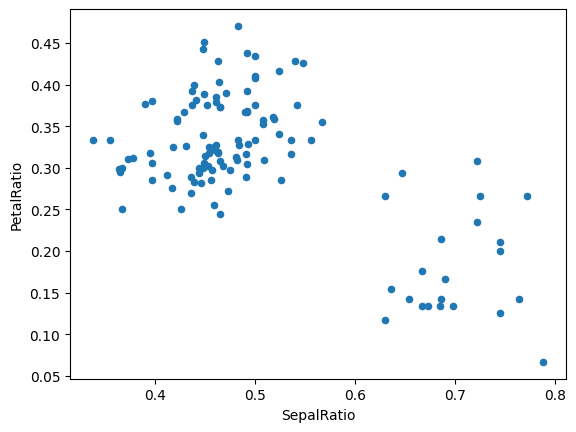

In [ ]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that's been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn't have a reference to the filtered DataFrame available.

The function signature for `assign()` is simply `**kwargs`. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the `DataFrame`. A copy of the original `DataFrame` is returned, with the new values inserted.

The order of `**kwargs` is preserved. This allows for dependent assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign()`.

In [ ]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [ ]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, `x['C']` will refer to the newly created column, that's equal to `dfa['A'] + dfa['B']`.

#### Indexing / selection

The basics of indexing are as follows:

|Operation                     |Syntax         |Result   |
|:-------                      |:-----         |:-----   |
|Select column                 |`df[col]`      |Series   |
|Select row by label           |`df.loc[label]`|Series   |
|Select row by integer location|`df.iloc[loc]` |Series   |
|Slice rows                    |`df[5:10] `    |DataFrame|
|Select rows by boolean vector |`df[bool_vec]` |DataFrame|

Row selection, for example, returns a `Series` whose index is the columns of the `DataFrame`:

In [ ]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [ ]:
from IPython.display import HTML

display(
    HTML(
        """


<link rel="stylesheet" href="https://ocademy-ai.github.io/machine-learning/_static/style.css">

<div class='full-width docutils' >
  <div class="admonition note pandastutor" name="html-admonition" style="margin-right:20%">
    <p class="admonition-title pandastutor">Let's visualize it! 🎥</p>
    <div class="pandastutor inner" style="height:730px;">
      <iframe frameborder="0" scrolling="no" src="https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0Aimport%20numpy%20as%20np%0Ad%20%3D%20%7B%0A%20%20%20%20%22one%22%3A%20pd.Series%28%5B1.0,%202.0,%203.0%5D,%20index%3D%5B%22a%22,%20%22b%22,%20%22c%22%5D%29,%0A%20%20%20%20%22two%22%3A%20pd.Series%28%5B1.0,%202.0,%203.0,%204.0%5D,%20index%3D%5B%22a%22,%20%22b%22,%20%22c%22,%20%22d%22%5D%29,%0A%7D%0Adf%20%3D%20pd.DataFrame%28d%29%0Adf%5B%22flag%22%5D%20%3D%20df%5B%22one%22%5D%20%3E%202%0Adel%20df%5B%22two%22%5D%0Adf%5B%22foo%22%5D%20%3D%20%22bar%22%0Adf%5B%22one_trunc%22%5D%20%3Ddf.insert%281,%20%22bar%22,%20df%5B%22one%22%5D%29%0Adf.loc%5B%22b%22%5D&d=2023-09-19&lang=py&v=v1"> </iframe>
    </div>
  </div>
</div>

"""
    )
)


In [ ]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

#### Data alignment and arithmetic

Data alignment between `DataFrame` objects automatically aligns on **both** the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [ ]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [ ]:
df + df2

,A,B,C,D
0,-2.948481,-0.423878,-0.607636,NaN
1,-1.920105,2.541998,1.177187,NaN
2,0.810385,-1.458396,1.420052,NaN
3,1.405297,-0.623525,-0.060302,NaN
4,-0.360174,0.887550,-0.152828,NaN
5,3.116284,-0.400383,-1.851961,NaN
6,-0.010616,1.174856,-1.748294,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between `DataFrame` and `Series`, the default behavior is to align the `Series` **index** on the `DataFrame` **columns**, thus broadcasting row-wise. For example:

In [ ]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.093122,2.367471,0.509443,0.995821
2,2.251086,-1.823386,0.955111,-0.083409
3,2.351556,0.336914,0.313888,0.777614
4,1.492720,-0.146124,1.660733,2.685753
5,3.595088,0.013952,-1.699945,-1.258807
6,2.598365,0.038556,-1.147302,1.108468
7,2.161150,-1.110538,1.713914,-0.157944
8,3.347460,-0.744086,0.674301,-0.147782
9,2.715835,2.454629,0.698974,1.240166


Arithmetic operations with scalars operate element-wise:

In [ ]:
df * 5 + 2

,A,B,C,D
0,-6.561849,1.475187,-1.293874,-3.191283
1,-7.027457,13.312542,1.253340,1.787824
2,4.693579,-7.641741,3.481679,-3.608329
3,5.195929,3.159756,0.275566,0.696787
4,0.901749,0.744567,7.009793,10.237485
5,11.413589,1.544948,-9.793598,-9.485320
6,6.429977,1.667968,-7.030385,2.351056
7,4.243902,-4.077504,7.275695,-3.981001
8,10.175453,-2.245243,2.077633,-3.930195
9,7.017324,13.748331,2.200998,3.009549


In [ ]:
1 / df

,A,B,C,D
0,-0.583986,-9.527211,-1.517969,-0.963153
1,-0.553866,0.441987,-6.696488,-23.565357
2,1.856267,-0.518579,3.374549,-0.891531
3,1.564491,4.311251,-2.899503,-3.836671
4,-4.552692,-3.982688,0.998045,0.606981
5,0.531147,-10.987746,-0.423959,-0.435338
6,1.128674,-15.058810,-0.553686,14.242736
7,2.228261,-0.822706,0.947742,-0.835980
8,0.611587,-1.177789,64.405384,-0.843143
9,0.996547,0.425592,24.875922,4.952705


In [ ]:
df ** 4

,A,B,C,D
0,8.597859,0.000121,1.883423e-01,1.162034
1,10.626291,26.203594,4.972921e-04,0.000003
2,0.084225,13.827439,7.711465e-03,1.582902
3,0.166920,0.002895,1.414835e-02,0.004615
4,0.002328,0.003975,1.007858e+00,7.367132
5,12.564376,0.000069,3.095318e+01,27.841482
6,0.616206,0.000019,1.064009e+01,0.000024
7,0.040564,2.182835,1.239478e+00,2.047461
8,7.147716,0.519673,5.811809e-08,1.978773
9,1.013931,30.480685,2.611459e-06,0.001662


Boolean operators operate element-wise as well:

In [ ]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

In [ ]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [ ]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [ ]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


#### Transposing

To transpose, access the `T` attribute or `DataFrame.transpose()`, similar to an ndarray:

In [ ]:
df[:5].T

,0,1,2,3,4
A,-1.712370,-1.805491,0.538716,0.639186,-0.219650
B,-0.104963,2.262508,-1.928348,0.231951,-0.251087
C,-0.658775,-0.149332,0.296336,-0.344887,1.001959
D,-1.038257,-0.042435,-1.121666,-0.260643,1.647497


## Data indexing and selection

The axis labeling information in Pandas objects serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.
- Enables automatic and explicit data alignment.
- Allows intuitive getting and setting of subsets of the data set.

In this section, we will focus on the final point: namely, how to slice, dice, and generally get and set subsets of Pandas objects. The primary focus will be on Series and DataFrame as they have received more development attention in this area.

:::{note}
The Python and NumPy indexing operators `[]` and attribute operator `.` provide quick and easy access to Pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there's little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn't known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the optimized Pandas data access methods exposed in this chapter.
:::

Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called `chained assignment` and should be avoided.

### Different choices for indexing

Object selection has had a number of user-requested additions in order to support more explicit location-based indexing. Pandas now supports three types of multi-axis indexing.

- `.loc` is primarily label based, but may also be used with a boolean array. `.loc` will raise `KeyError` when the items are not found. Allowed inputs are:
  - A single label, e.g. `5` or `'a'` (Note that `5` is interpreted as a label of the index. This use is not an integer position along the index.).
  - A list or array of labels `['a', 'b', 'c']`.
  - A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index!)
  - A boolean array (any `NA` values will be treated as `False`).
  - A `callable` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).

- `.iloc` is primarily integer position based (from `0` to `length-1` of the axis), but may also be used with a boolean array. `.iloc` will raise `IndexError` if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). Allowed inputs are:
  - An integer e.g. `5`.
  - A list or array of integers `[4, 3, 0]`.
  - A slice object with ints `1:7`.
  - A boolean array (any `NA` values will be treated as `False`).
  - A `callable` function with one argument (the calling Series or DataFrame) that returns valid output for indexing (one of the above).
- `.loc`, `.iloc`, and also `[]` indexing can accept a `callable` as indexer.

Getting values from an object with multi-axes selection uses the following notation (using `.loc` as an example, but the following applies to `.iloc` as well). Any of the axes accessors may be the null slice `:`. Axes left out of the specification are assumed to be `:`, e.g. `p.loc['a']` is equivalent to `p.loc['a', :]`.

|**Object Type**|**Indexers**                        |
|:--            |:-                                  |
|Series         |`s.loc[indexer]`                    |
|DataFrame      |`df.loc[row_indexer, column_indexer]`|

### Basics

As mentioned when introducing the data structures in the last section, the primary function of indexing with `[]` (a.k.a.` __getitem__` for those familiar with implementing class behavior in Python) is selecting out lower-dimensional slices. The following table shows return type values when indexing Pandas objects with `[]`:

|**Object Type**|**Selection**   |Return Value Type                |
|:-             |:-              |:-                               |
|Series         |`series[label]` |scalar value                     |
|DataFrame      |`frame[colname]`|`Series` corresponding to colname|

Here we construct a simple time series data set to use for illustrating the indexing functionality:

In [ ]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-1.003075,-1.068915,1.270093,1.131469
2000-01-02,0.508569,-0.324633,-2.092349,-0.550827
2000-01-03,0.762823,-0.897289,-2.043889,-1.096294
2000-01-04,0.522446,2.152613,1.639017,0.314416
2000-01-05,-0.302838,0.915904,0.803904,-1.231580
2000-01-06,-0.834977,-0.800550,0.390671,-0.679977
2000-01-07,-1.556795,-0.502958,-1.239671,0.730893
2000-01-08,-0.424052,1.055065,0.900078,3.551748


:::{note}
None of the indexing functionality is time series specific unless specifically stated.
:::

Thus, as per above, we have the most basic indexing using `[]`:

In [ ]:
s = df['A']

s[dates[5]]

-0.8349774413616455

You can pass a list of columns to `[]` to select columns in that order. If a column is not contained in the DataFrame, an exception will be raised. Multiple columns can also be set in this manner:

In [ ]:
df

,A,B,C,D
2000-01-01,-1.003075,-1.068915,1.270093,1.131469
2000-01-02,0.508569,-0.324633,-2.092349,-0.550827
2000-01-03,0.762823,-0.897289,-2.043889,-1.096294
2000-01-04,0.522446,2.152613,1.639017,0.314416
2000-01-05,-0.302838,0.915904,0.803904,-1.231580
2000-01-06,-0.834977,-0.800550,0.390671,-0.679977
2000-01-07,-1.556795,-0.502958,-1.239671,0.730893
2000-01-08,-0.424052,1.055065,0.900078,3.551748


In [ ]:
df[['B', 'A']] = df[['A', 'B']]
df

,A,B,C,D
2000-01-01,-1.068915,-1.003075,1.270093,1.131469
2000-01-02,-0.324633,0.508569,-2.092349,-0.550827
2000-01-03,-0.897289,0.762823,-2.043889,-1.096294
2000-01-04,2.152613,0.522446,1.639017,0.314416
2000-01-05,0.915904,-0.302838,0.803904,-1.231580
2000-01-06,-0.800550,-0.834977,0.390671,-0.679977
2000-01-07,-0.502958,-1.556795,-1.239671,0.730893
2000-01-08,1.055065,-0.424052,0.900078,3.551748


You may find this useful for applying a transform (in-place) to a subset of the columns.

Pandas aligns all AXES when setting `Series` and `DataFrame` from `.loc`, and `.iloc`.

This will not modify `df` because the column alignment is before value assignment.

In [ ]:
df[['A', 'B']]

,A,B
2000-01-01,-1.068915,-1.003075
2000-01-02,-0.324633,0.508569
2000-01-03,-0.897289,0.762823
2000-01-04,2.152613,0.522446
2000-01-05,0.915904,-0.302838
2000-01-06,-0.800550,-0.834977
2000-01-07,-0.502958,-1.556795
2000-01-08,1.055065,-0.424052


In [ ]:
df.loc[:, ['B', 'A']] = df[['A', 'B']]
df[['A', 'B']]

,A,B
2000-01-01,-1.068915,-1.003075
2000-01-02,-0.324633,0.508569
2000-01-03,-0.897289,0.762823
2000-01-04,2.152613,0.522446
2000-01-05,0.915904,-0.302838
2000-01-06,-0.800550,-0.834977
2000-01-07,-0.502958,-1.556795
2000-01-08,1.055065,-0.424052


The correct way to swap column values is by using raw values:

In [ ]:
df.loc[:, ['B', 'A']] = df[['A', 'B']].to_numpy()
df[['A', 'B']]

,A,B
2000-01-01,-1.003075,-1.068915
2000-01-02,0.508569,-0.324633
2000-01-03,0.762823,-0.897289
2000-01-04,0.522446,2.152613
2000-01-05,-0.302838,0.915904
2000-01-06,-0.834977,-0.800550
2000-01-07,-1.556795,-0.502958
2000-01-08,-0.424052,1.055065


### Attribute access

You may access an index on a `Series` or column on a `DataFrame` directly as an attribute:

In [ ]:
sa = pd.Series([1, 2, 3], index=list('abc'))
dfa = df.copy()

In [ ]:
sa.b

2

In [ ]:
dfa.A

2000-01-01   -1.003075
2000-01-02    0.508569
2000-01-03    0.762823
2000-01-04    0.522446
2000-01-05   -0.302838
2000-01-06   -0.834977
2000-01-07   -1.556795
2000-01-08   -0.424052
Freq: D, Name: A, dtype: float64

In [ ]:
sa.a = 5
sa

a    5
b    2
c    3
dtype: int64

In [ ]:
dfa.A = list(range(len(dfa.index)))  # ok if A already exists
dfa

,A,B,C,D
2000-01-01,0,-1.068915,1.270093,1.131469
2000-01-02,1,-0.324633,-2.092349,-0.550827
2000-01-03,2,-0.897289,-2.043889,-1.096294
2000-01-04,3,2.152613,1.639017,0.314416
2000-01-05,4,0.915904,0.803904,-1.231580
2000-01-06,5,-0.800550,0.390671,-0.679977
2000-01-07,6,-0.502958,-1.239671,0.730893
2000-01-08,7,1.055065,0.900078,3.551748


In [ ]:
dfa['A'] = list(range(len(dfa.index)))  # use this form to create a new column
dfa

,A,B,C,D
2000-01-01,0,-1.068915,1.270093,1.131469
2000-01-02,1,-0.324633,-2.092349,-0.550827
2000-01-03,2,-0.897289,-2.043889,-1.096294
2000-01-04,3,2.152613,1.639017,0.314416
2000-01-05,4,0.915904,0.803904,-1.231580
2000-01-06,5,-0.800550,0.390671,-0.679977
2000-01-07,6,-0.502958,-1.239671,0.730893
2000-01-08,7,1.055065,0.900078,3.551748


- You can use this access only if the index element is a valid Python identifier, e.g. s.1 is not allowed. See here for an explanation of valid identifiers.

- The attribute will not be available if it conflicts with an existing method name, e.g. s.min is not allowed, but s['min'] is possible.

- Similarly, the attribute will not be available if it conflicts with any of the following list: index, major_axis, minor_axis, items.

- In any of these cases, standard indexing will still work, e.g. s['1'], s['min'], and s['index'] will access the corresponding element or column.

If you are using the IPython environment, you may also use tab-completion to see these accessible attributes.

You can also assign a `dict` to a row of a `DataFrame`:

In [ ]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x.iloc[1] = {'x': 9, 'y': 99}
x

,x,y
0,1,3
1,9,99
2,3,5


You can use attribute access to modify an existing element of a Series or column of a DataFrame, but be careful; if you try to use attribute access to create a new column, it creates a new attribute rather than a new column. In 0.21.0 and later, this will raise a `UserWarning`:

In [ ]:
df = pd.DataFrame({'one': [1., 2., 3.]})
df.two = [4, 5, 6]

C:\Users\fuqiongying\AppData\Local\Temp\ipykernel_15064\269534380.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.two = [4, 5, 6]


In [ ]:
df

,one
0,1.0
1,2.0
2,3.0


### Slicing ranges

For now, we explain the semantics of slicing using the [] operator.

With Series, the syntax works exactly as with an ndarray, returning a slice of the values and the corresponding labels:

In [ ]:
s

2000-01-01   -1.003075
2000-01-02    0.508569
2000-01-03    0.762823
2000-01-04    0.522446
2000-01-05   -0.302838
2000-01-06   -0.834977
2000-01-07   -1.556795
2000-01-08   -0.424052
Freq: D, Name: A, dtype: float64

In [ ]:
s[:5]

2000-01-01   -1.003075
2000-01-02    0.508569
2000-01-03    0.762823
2000-01-04    0.522446
2000-01-05   -0.302838
Freq: D, Name: A, dtype: float64

In [ ]:
s[::2]

2000-01-01   -1.003075
2000-01-03    0.762823
2000-01-05   -0.302838
2000-01-07   -1.556795
Freq: 2D, Name: A, dtype: float64

In [ ]:
s[::-1]

2000-01-08   -0.424052
2000-01-07   -1.556795
2000-01-06   -0.834977
2000-01-05   -0.302838
2000-01-04    0.522446
2000-01-03    0.762823
2000-01-02    0.508569
2000-01-01   -1.003075
Freq: -1D, Name: A, dtype: float64

Note that setting works as well:

In [ ]:
s2 = s.copy()
s2[:5] = 0
s2

2000-01-01    0.000000
2000-01-02    0.000000
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06   -0.834977
2000-01-07   -1.556795
2000-01-08   -0.424052
Freq: D, Name: A, dtype: float64

With DataFrame, slicing inside of `[]` slices the rows. This is provided largely as a convenience since it is such a common operation.

In [ ]:
df[:3]

,one
0,1.0
1,2.0
2,3.0


In [ ]:
df[::-1]

,one
2,3.0
1,2.0
0,1.0


## Acknowledgments

Thanks for [Pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html). It contributes the majority of the content in this chapter.